In [750]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.io as pio
import nbformat
from scipy.stats import gaussian_kde
import geopandas as gpd

In [751]:
# globally mute warnings
import warnings
warnings.filterwarnings("ignore")

# Financial Data

In [752]:
# read the data
df = pd.read_csv('../../data/processed/cdp_summary_processed_v2.csv')

In [753]:
jet_blue_mkt_cap = df[df['companyname'] == 'Jetblue Airways Corporation']['mkt cap'].values[-1]
gm_mkt_cap = df[df['companyname'] == 'General Motors Company']['mkt cap'].values[-1]

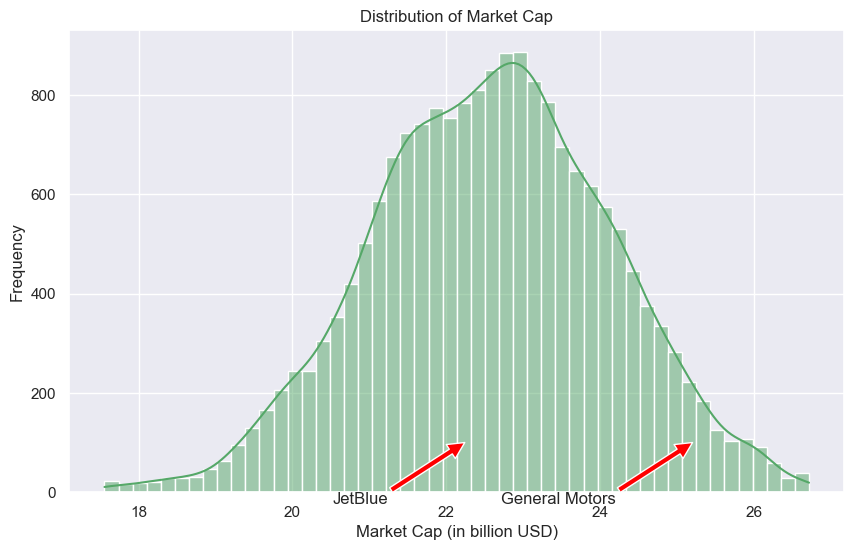

In [754]:
sns.set(style='darkgrid')
plt.figure(figsize=(10, 6))
sns.histplot(df['mkt cap'], kde=True, color='g', bins=50)
plt.title('Distribution of Market Cap')
plt.xlabel('Market Cap (in billion USD)')
plt.ylabel('Frequency')
plt.annotate('JetBlue', xy=(jet_blue_mkt_cap, 100), xytext=(jet_blue_mkt_cap  - 1, -0.00002),
             arrowprops=dict(facecolor='red', ),
             horizontalalignment='right', verticalalignment='top')
plt.annotate('General Motors', xy=(gm_mkt_cap, 100), xytext=(gm_mkt_cap - 1, -0.00002),
                arrowprops=dict(facecolor='red'),
                horizontalalignment='right', verticalalignment='top')

plt.savefig('../../thesis_tex/figures/financial_preds/mkt_cap_dist.png')

plt.show()

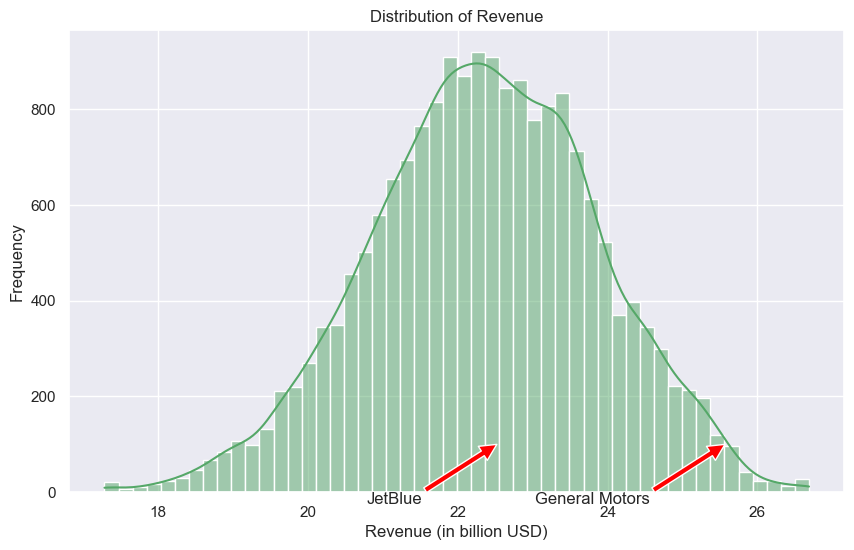

In [755]:
# do the same for revenue
jet_blue_revenue = df[df['companyname'] == 'Jetblue Airways Corporation']['revenue'].values[-1]
gm_revenue = df[df['companyname'] == 'General Motors Company']['revenue'].values[-1]

plt.figure(figsize=(10, 6))
sns.histplot(df['revenue'], kde=True, color='g', bins=50)
plt.title('Distribution of Revenue')
plt.xlabel('Revenue (in billion USD)')
plt.ylabel('Frequency')
plt.annotate('JetBlue', xy=(jet_blue_revenue, 100), xytext=(jet_blue_revenue - 1, -0.00002),
             arrowprops=dict(facecolor='red', ),
             horizontalalignment='right', verticalalignment='top')
plt.annotate('General Motors', xy=(gm_revenue, 100), xytext=(gm_revenue - 1, -0.00002),
                arrowprops=dict(facecolor='red'),
                horizontalalignment='right', verticalalignment='top')

plt.savefig('../../thesis_tex/figures/financial_preds/revenue_dist.png')
plt.show()

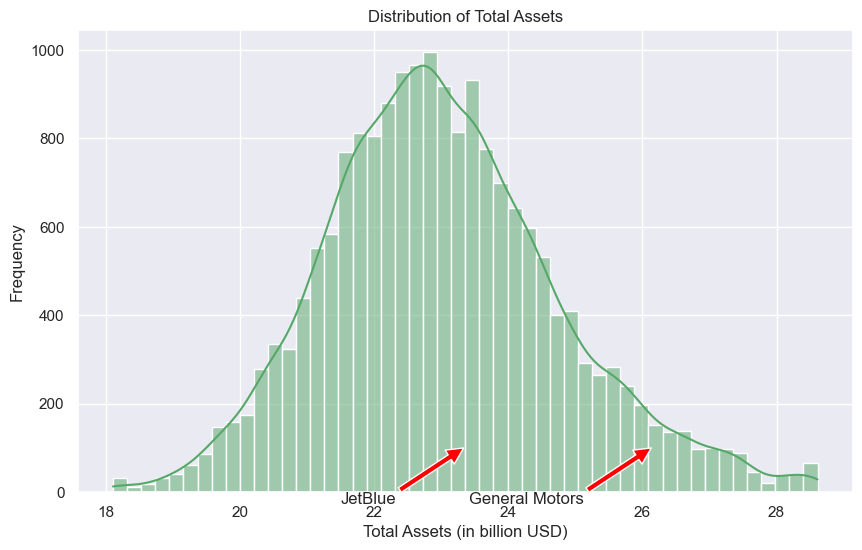

In [756]:
# do the same for tot assets
jet_blue_tot_assets = df[df['companyname'] == 'Jetblue Airways Corporation']['tot assets'].values[-1]
gm_tot_assets = df[df['companyname'] == 'General Motors Company']['tot assets'].values[-1]

plt.figure(figsize=(10, 6))
sns.histplot(df['tot assets'], kde=True, color='g', bins=50)
plt.title('Distribution of Total Assets')
plt.xlabel('Total Assets (in billion USD)')
plt.ylabel('Frequency')
plt.annotate('JetBlue', xy=(jet_blue_tot_assets, 100), xytext=(jet_blue_tot_assets - 1, -0.00002),
             arrowprops=dict(facecolor='red', ),
             horizontalalignment='right', verticalalignment='top')
plt.annotate('General Motors', xy=(gm_tot_assets, 100), xytext=(gm_tot_assets - 1, -0.00002),
                arrowprops=dict(facecolor='red'),
                horizontalalignment='right', verticalalignment='top')

plt.savefig('../../thesis_tex/figures/financial_preds/tot_assets_dist.png')
plt.show()

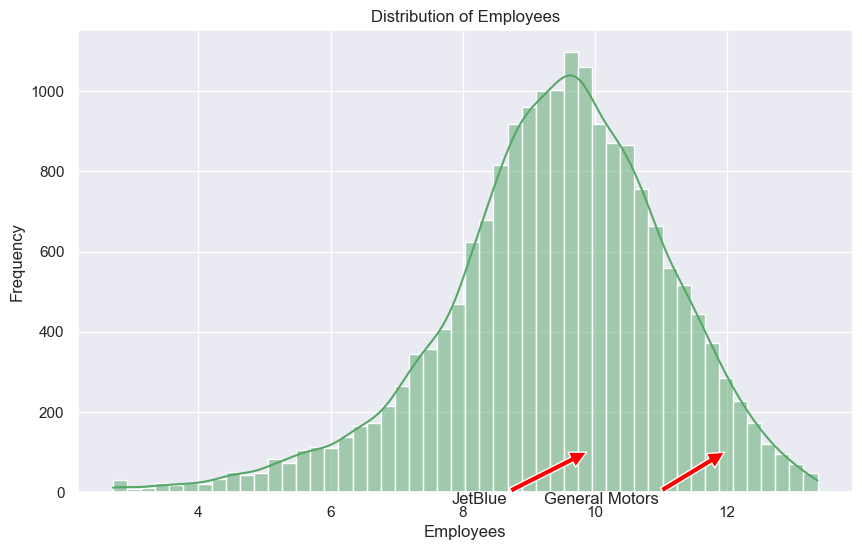

In [757]:
# do the same for employees
jet_blue_employees = df[df['companyname'] == 'Jetblue Airways Corporation']['employees'].values[-1]
gm_employees = df[df['companyname'] == 'General Motors Company']['employees'].values[-1]

plt.figure(figsize=(10, 6))
sns.histplot(df['employees'], kde=True, color='g', bins=50)
plt.title('Distribution of Employees')
plt.xlabel('Employees')
plt.ylabel('Frequency')
plt.annotate('JetBlue', xy=(jet_blue_employees, 100), xytext=(jet_blue_employees - 1.2, -0.00002),
             arrowprops=dict(facecolor='red', ),
             horizontalalignment='right', verticalalignment='top')
plt.annotate('General Motors', xy=(gm_employees, 100), xytext=(gm_employees - 1, -0.00002),
                arrowprops=dict(facecolor='red'),
                horizontalalignment='right', verticalalignment='top')

plt.savefig('../../thesis_tex/figures/financial_preds/employees_dist.png')
plt.show()

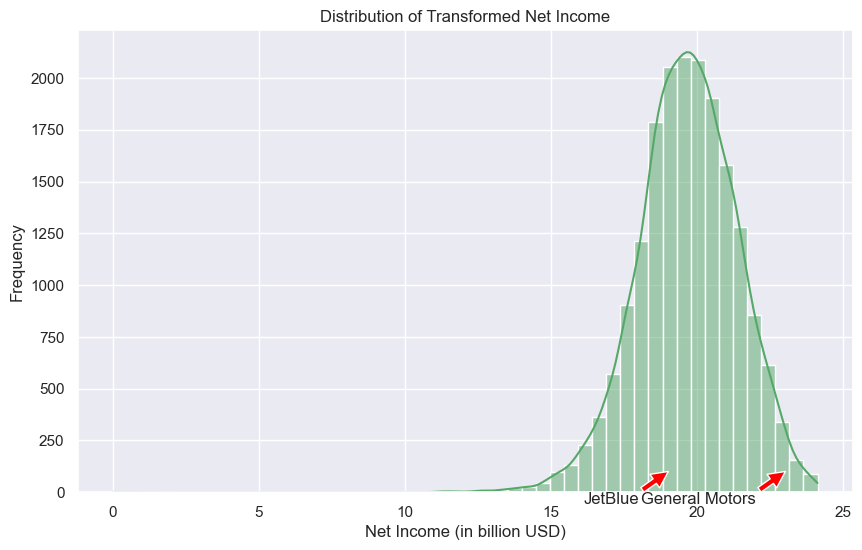

In [758]:
# do the same for net income
jet_blue_net_income = df[df['companyname'] == 'Jetblue Airways Corporation']['net income'].values[-1]
gm_net_income = df[df['companyname'] == 'General Motors Company']['net income'].values[-1]

plt.figure(figsize=(10, 6))
sns.histplot(df['net income'], kde=True, color='g', bins=50)
plt.title('Distribution of Transformed Net Income')
plt.xlabel('Net Income (in billion USD)')
plt.ylabel('Frequency')
plt.annotate('JetBlue', xy=(jet_blue_net_income, 100), xytext=(jet_blue_net_income - 1, -0.00002),
             arrowprops=dict(facecolor='red', ),
             horizontalalignment='right', verticalalignment='top')
plt.annotate('General Motors', xy=(gm_net_income, 100), xytext=(gm_net_income - 1, -0.00002),
                arrowprops=dict(facecolor='red'),
                horizontalalignment='right', verticalalignment='top')

plt.savefig('../../thesis_tex/figures/financial_preds/net_income_dist.png')
plt.show()

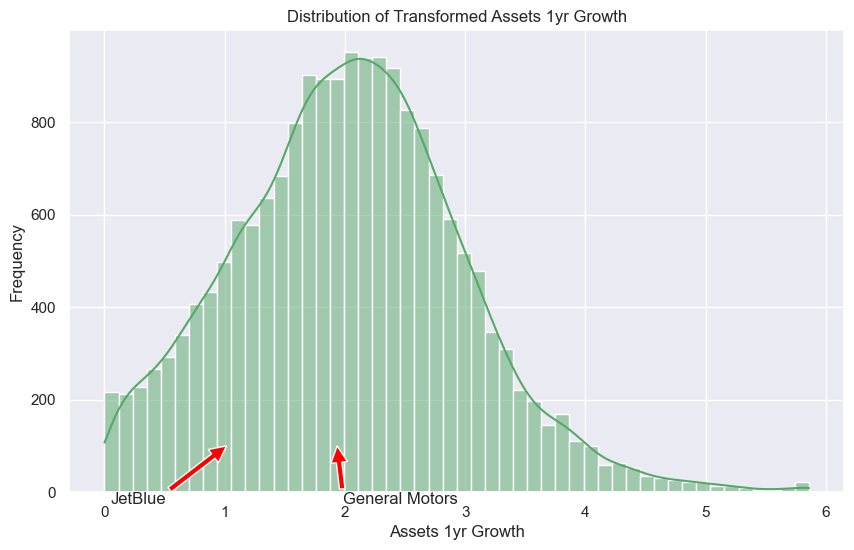

In [759]:
# do the same for assets 1yr growth
jet_blue_assets_1yr_growth = df[df['companyname'] == 'Jetblue Airways Corporation']['assets 1y gr'].values[-1]
gm_assets_1yr_growth = df[df['companyname'] == 'General Motors Company']['assets 1y gr'].values[-1]

plt.figure(figsize=(10, 6))
sns.histplot(df['assets 1y gr'], kde=True, color='g', bins=50)
plt.title('Distribution of Transformed Assets 1yr Growth')
plt.xlabel('Assets 1yr Growth')
plt.ylabel('Frequency')
plt.annotate('JetBlue', xy=(jet_blue_assets_1yr_growth, 100), xytext=(jet_blue_assets_1yr_growth - 0.5, -0.00002),
             arrowprops=dict(facecolor='red', ),
             horizontalalignment='right', verticalalignment='top')
plt.annotate('General Motors', xy=(gm_assets_1yr_growth, 100), xytext=(gm_assets_1yr_growth + 1, -0.00002),
                arrowprops=dict(facecolor='red'),
                horizontalalignment='right', verticalalignment='top')

plt.savefig('../../thesis_tex/figures/financial_preds/assets_1yr_growth_dist.png')
plt.show()

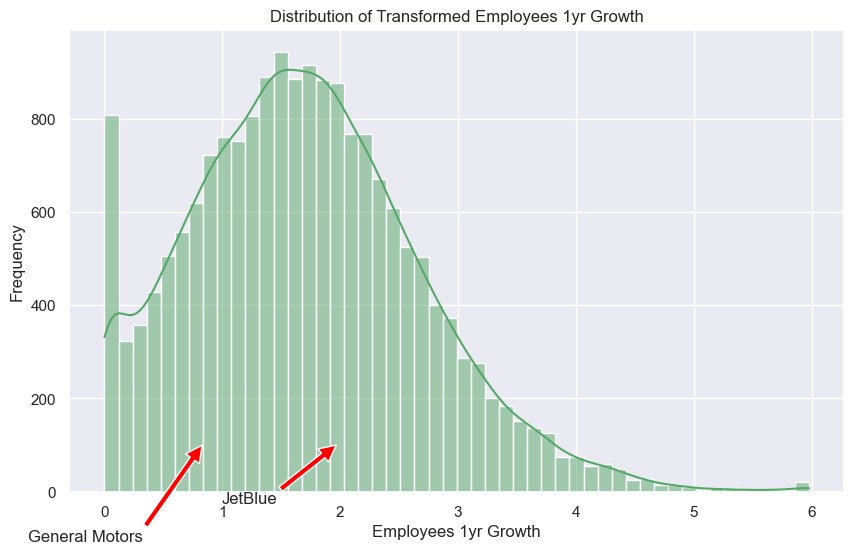

In [760]:
# do the same for employees 1yr growth
jet_blue_employees_1yr_growth = df[df['companyname'] == 'Jetblue Airways Corporation']['employees 1y gr'].values[-1]
gm_employees_1yr_growth = df[df['companyname'] == 'General Motors Company']['employees 1y gr'].values[-1]

plt.figure(figsize=(10, 6))
sns.histplot(df['employees 1y gr'], kde=True, color='g', bins=50)
plt.title('Distribution of Transformed Employees 1yr Growth')
plt.xlabel('Employees 1yr Growth')
plt.ylabel('Frequency')
plt.annotate('JetBlue', xy=(jet_blue_employees_1yr_growth, 100), xytext=(jet_blue_employees_1yr_growth - 0.5, -0.00002),
             arrowprops=dict(facecolor='red', ),
             horizontalalignment='right', verticalalignment='top')
plt.annotate('General Motors', xy=(gm_employees_1yr_growth, 100), xytext=(gm_employees_1yr_growth - 0.5, -80),
                arrowprops=dict(facecolor='red'),
                horizontalalignment='right', verticalalignment='top')

plt.savefig('../../thesis_tex/figures/financial_preds/employees_1yr_growth_dist.png')
plt.show()

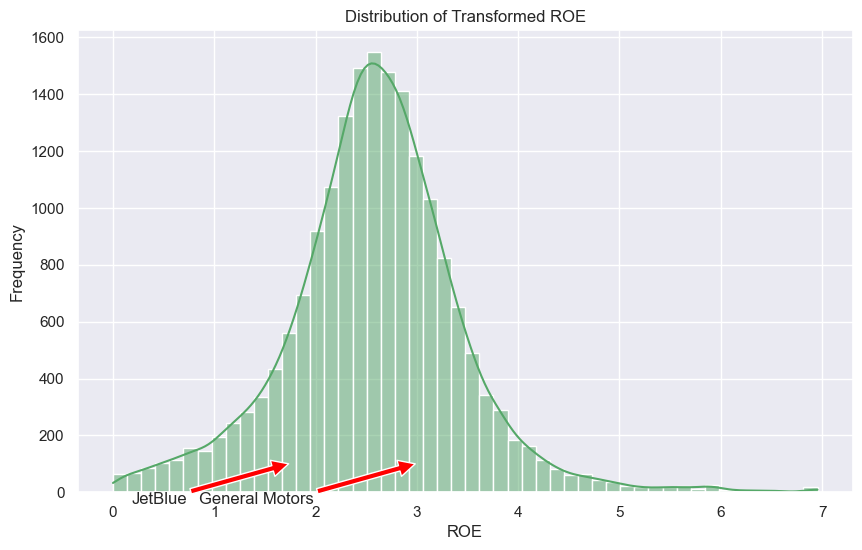

In [761]:
# do the same for roe
jet_blue_roe = df[df['companyname'] == 'Jetblue Airways Corporation']['roe'].values[-1]
gm_roe = df[df['companyname'] == 'General Motors Company']['roe'].values[-1]

plt.figure(figsize=(10, 6))
sns.histplot(df['roe'], kde=True, color='g', bins=50)
plt.title('Distribution of Transformed ROE')
plt.xlabel('ROE')
plt.ylabel('Frequency')
plt.annotate('JetBlue', xy=(jet_blue_roe, 100), xytext=(jet_blue_roe - 1, -0.00002),
             arrowprops=dict(facecolor='red', ),
             horizontalalignment='right', verticalalignment='top')
plt.annotate('General Motors', xy=(gm_roe, 100), xytext=(gm_roe - 1, -0.00002),
                arrowprops=dict(facecolor='red'),
                horizontalalignment='right', verticalalignment='top')

plt.savefig('../../thesis_tex/figures/financial_preds/roe_dist.png')
plt.show()

#  now let's do emissions breakdown by country and continent

In [762]:
# emission breakdown by continent with count, mean, median, std
emission_breakdown = df.groupby('continent')['ghg_change_real'].agg(['count', 'mean', 'median', 'std'])
emission_breakdown = np.round(emission_breakdown, 2)

# percentage symbol in each cell but the count
emission_breakdown['mean'] = emission_breakdown['mean'].astype(str) + '\%'
emission_breakdown['median'] = emission_breakdown['median'].astype(str) + '\%'
emission_breakdown['std'] = emission_breakdown['std'].astype(str) + '\%'

# capitalize column names
emission_breakdown.columns = [col.capitalize() for col in emission_breakdown.columns]

# change index name to Continent
emission_breakdown.index.name = 'Continent'


emission_breakdown.to_latex('../../thesis_tex/tables/emission_breakdown.tex', longtable=True)

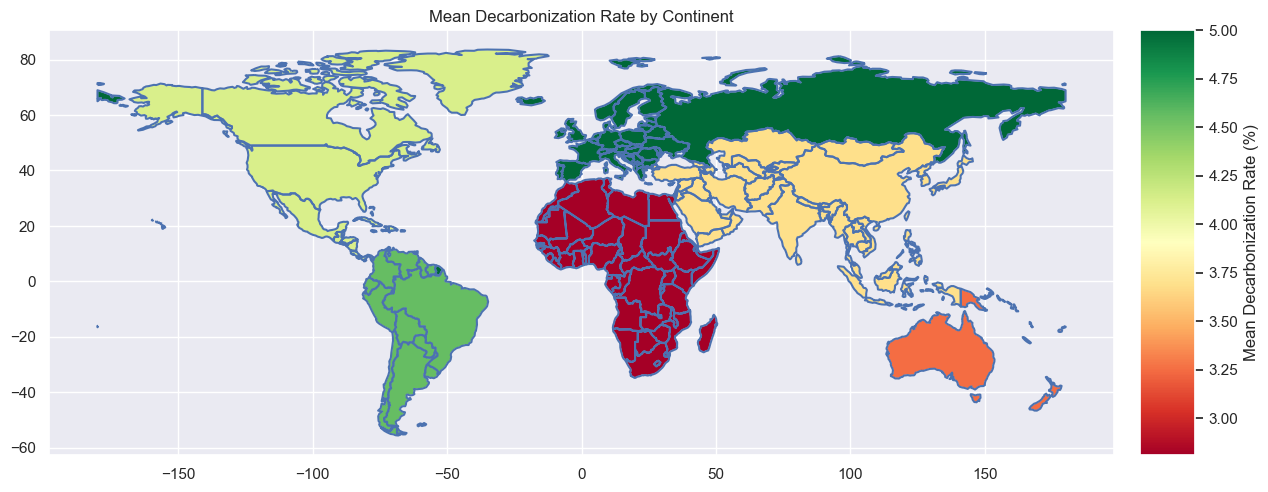

In [763]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
# now plot the mean emission breadkonw by continent with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the GeoPandas DataFrame with the emission breakdown
world = world.merge(emission_breakdown, left_on='continent', right_index=True)


# Create the plot
fig, ax = plt.subplots(1, figsize=(15, 10))

# Plot country boundaries
world.boundary.plot(ax=ax)

# Plot mean emissions with a color map
plot = world.plot(column='Mean', ax=ax, cmap='RdYlGn', legend=False,
           legend_kwds={'title': "Mean Decarbonization Rate (%)"})

# Create color bar
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
sm = plt.cm.ScalarMappable(cmap='RdYlGn', norm=plt.Normalize(vmin=2.81, vmax=5))
sm._A = []
cbar = plt.colorbar(sm, cax=cax)
cbar.set_label('Mean Decarbonization Rate (%)')

# Adjust the legend/title manually if necessary
# This part is often context-specific and might require handling the color bar directly, as shown below

# Show the plot
ax.set_title('Mean Decarbonization Rate by Continent')
plt.show()

In [764]:
# do the same for sector
emission_breakdown_sector = df.groupby('gind')['ghg_change_real'].agg(['count', 'mean', 'median', 'std'])
emission_breakdown_sector = np.round(emission_breakdown_sector, 2)

# percentage symbol in each cell but the count
emission_breakdown_sector['mean'] = emission_breakdown_sector['mean'].astype(str) + '\%'
emission_breakdown_sector['median'] = emission_breakdown_sector['median'].astype(str) + '\%'
emission_breakdown_sector['std'] = emission_breakdown_sector['std'].astype(str) + '\%'
emission_breakdown_sector.columns = [col.capitalize() for col in emission_breakdown_sector.columns]

# change index name to Sector
emission_breakdown_sector.index.name = 'Sector'


emission_breakdown_sector.to_latex('../../thesis_tex/tables/emission_breakdown_sector.tex', longtable=True)

In [765]:
# do the same for country
emission_breakdown_country = df.groupby('country')['ghg_change_real'].agg(['count', 'mean', 'median', 'std'])
emission_breakdown_country = np.round(emission_breakdown_country, 2)

# percentage symbol in each cell but the count
emission_breakdown_country['mean'] = emission_breakdown_country['mean'].astype(str) + '\%'
emission_breakdown_country['median'] = emission_breakdown_country['median'].astype(str) + '\%'
emission_breakdown_country['std'] = emission_breakdown_country['std'].astype(str) + '\%'
emission_breakdown_country.columns = [col.capitalize() for col in emission_breakdown_country.columns]

# change index name to Country
emission_breakdown_country.index.name = 'Country'


emission_breakdown_country.to_latex('../../thesis_tex/tables/emission_breakdown_country.tex', longtable=True)

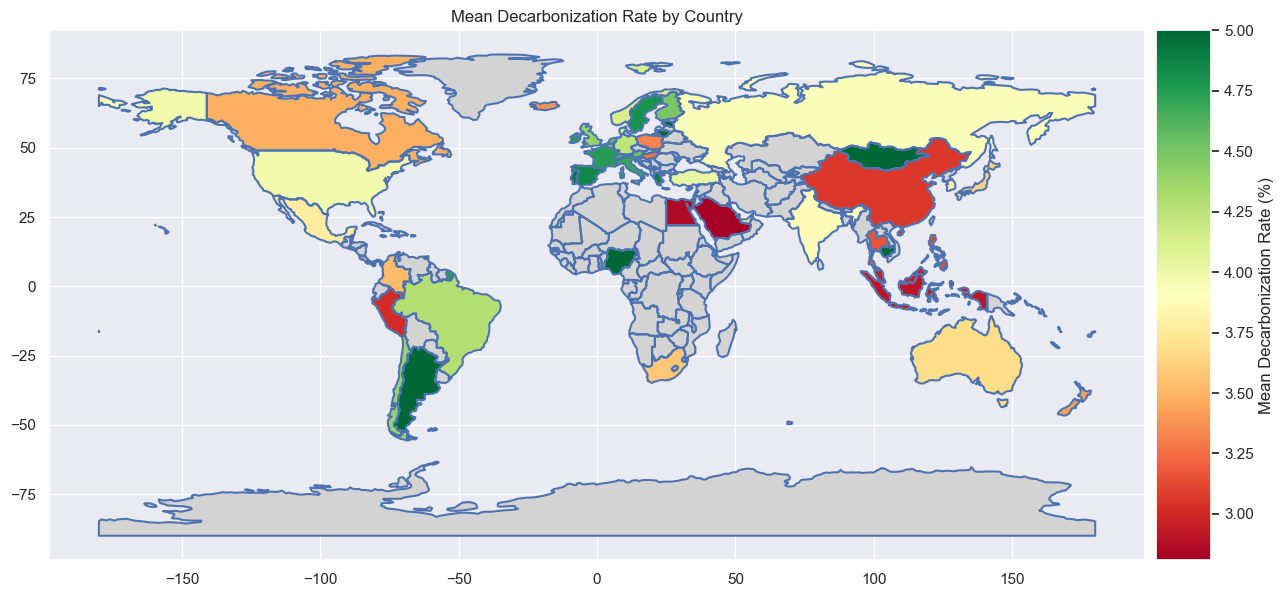

In [772]:
# now plot the mean emission breadkonw by country with geopandas

# rename USA to United States
emission_breakdown_country = emission_breakdown_country.rename(index={'USA': 'United States of America'})
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


# Merge the GeoPandas DataFrame with the emission breakdown
world = world.merge(emission_breakdown_country, how = 'left', left_on='name', right_index=True)

# Create the plot
fig, ax = plt.subplots(1, figsize=(15, 10))

# Plot country boundaries
world.boundary.plot(ax=ax)

# Plot mean emissions with a color map
plot = world.plot(column='Mean', ax=ax, cmap='RdYlGn', legend=False,
           legend_kwds={'title': "Mean Decarbonization Rate (%)"},
           missing_kwds={'color': 'lightgrey', 'label': 'Missing data'})

# Create color bar
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
sm = plt.cm.ScalarMappable(cmap='RdYlGn', norm=plt.Normalize(vmin=2.81, vmax=5))
sm._A = []
cbar = plt.colorbar(sm, cax=cax)
cbar.set_label('Mean Decarbonization Rate (%)')

# Adjust the legend/title manually if necessary
# This part is often context-specific and might require handling the color bar directly, as shown below

# Show the plot
ax.set_title('Mean Decarbonization Rate by Country')
plt.show()

In [767]:
# do the same for year
emission_breakdown_year = df.groupby('year')['ghg_change_real'].agg(['count', 'mean', 'median', 'std'])
emission_breakdown_year.reset_index(inplace=True)
emission_breakdown_year.year = np.round(emission_breakdown_year.year + 2011, 0).astype(int)
emission_breakdown_year.set_index('year', inplace=True)

emission_breakdown_year = np.round(emission_breakdown_year, 2)

# percentage symbol in each cell but the count
emission_breakdown_year['mean'] = emission_breakdown_year['mean'].astype(str) + '\%'
emission_breakdown_year['median'] = emission_breakdown_year['median'].astype(str) + '\%'
emission_breakdown_year['std'] = emission_breakdown_year['std'].astype(str) + '\%'
emission_breakdown_year.columns = [col.capitalize() for col in emission_breakdown_year.columns]

# change index name to Year
emission_breakdown_year.index.name = 'Year'


emission_breakdown_year.to_latex('../../thesis_tex/tables/emission_breakdown_year.tex', longtable=True)